# Task : Analysing Data of netfilx and helping improve the suggession and other mecanism for users 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1) Distribution of Movies vs TV Shows

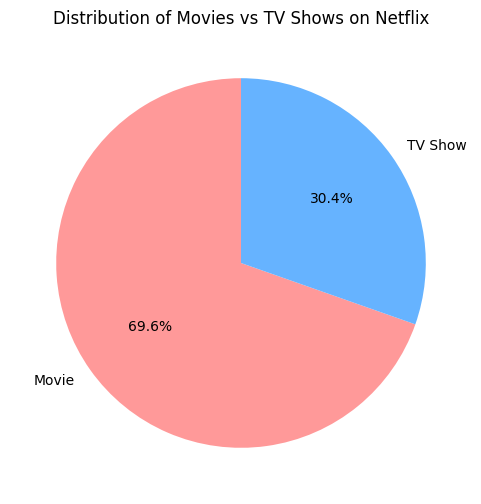

In [26]:
show_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
show_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999','#66B3FF'], startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.ylabel('')
plt.show()

## 2) Top 10 Countries with the Most Content

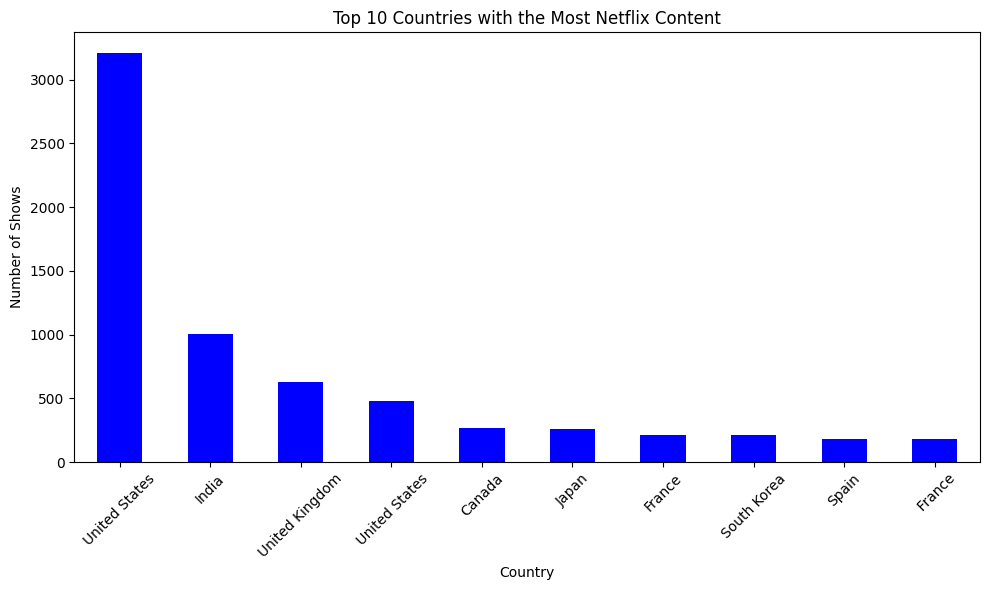

In [27]:
country_counts = df['country'].dropna().str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with the Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3) Content Added Over Time

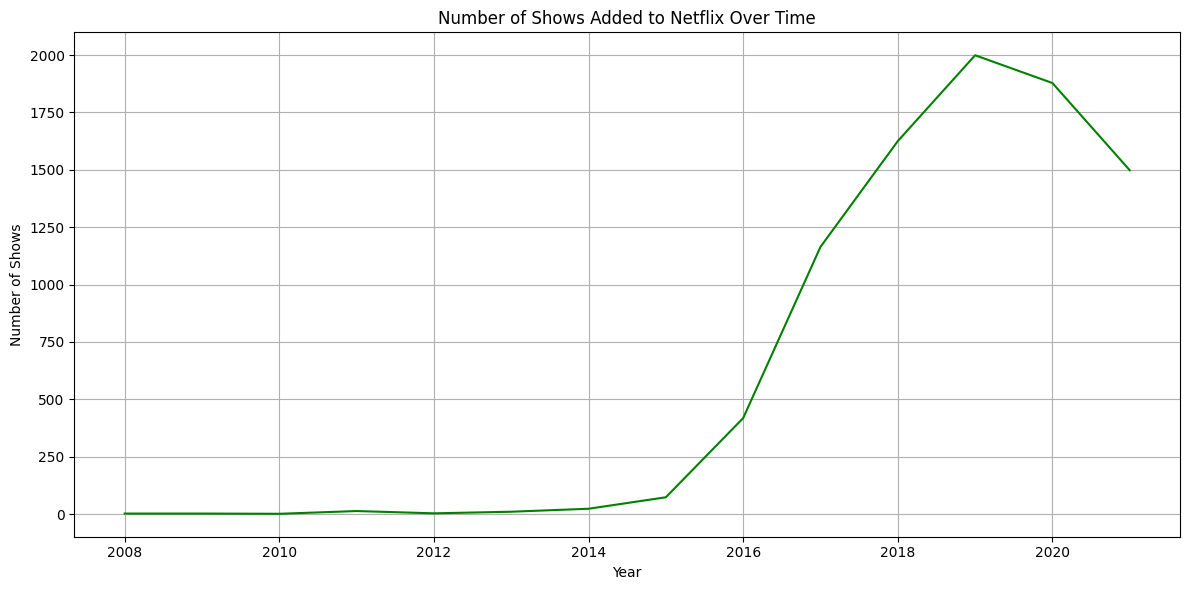

In [28]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

content_per_year = df.groupby('year_added').size()

plt.figure(figsize=(12, 6))
content_per_year.plot(kind='line', color='green')
plt.title('Number of Shows Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4) Top 10 Directors with the Most Content

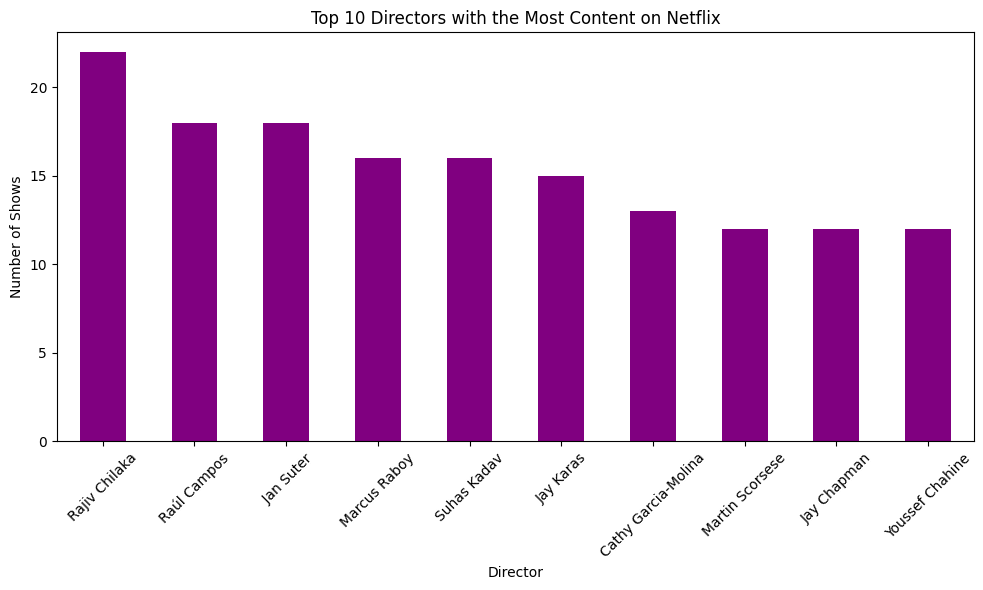

In [29]:
director_counts = df['director'].dropna().str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Directors with the Most Content on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5) Duration Distribution of Movies and TV Shows

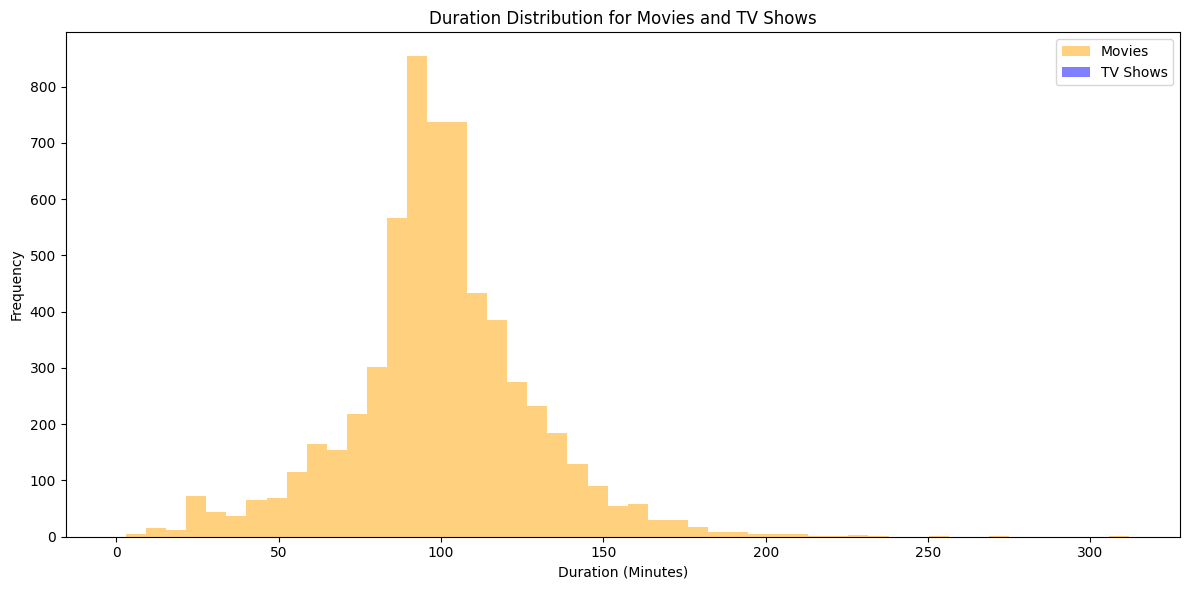

In [36]:
df['duration'] = df['duration'].astype(str).str.replace(' min', '', regex=False)

df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
plt.hist(df_movies['duration'].dropna(), bins=50, alpha=0.5, label='Movies', color='orange')
plt.hist(df_tv_shows['duration'].dropna(), bins=50, alpha=0.5, label='TV Shows', color='blue')
plt.title('Duration Distribution for Movies and TV Shows')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## 6) Most Common Genres on Netflix

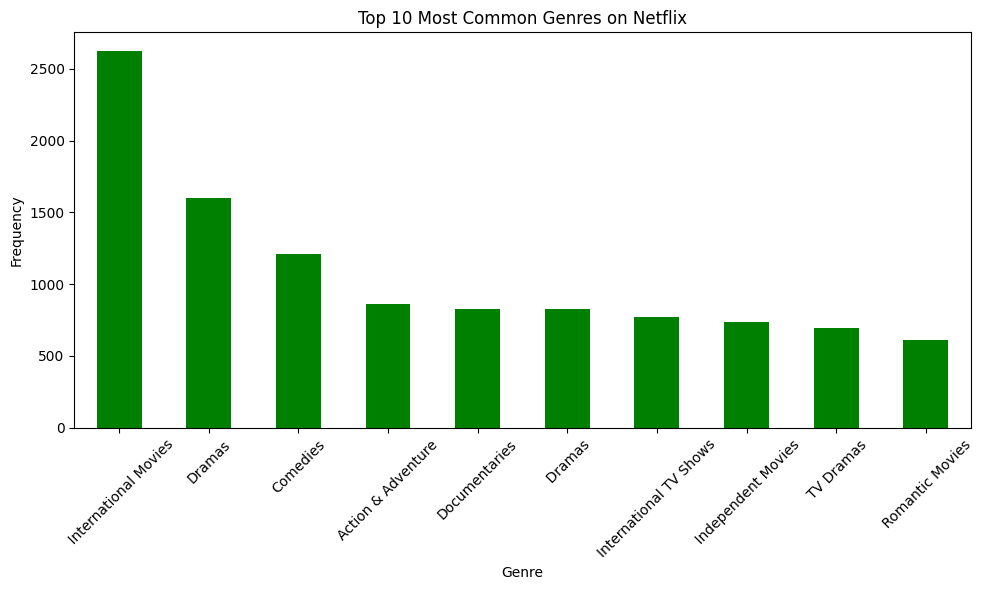

In [31]:
genre_series = df['listed_in'].dropna().str.split(',').explode()

top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7) Top 10 Most Frequent Cast Members

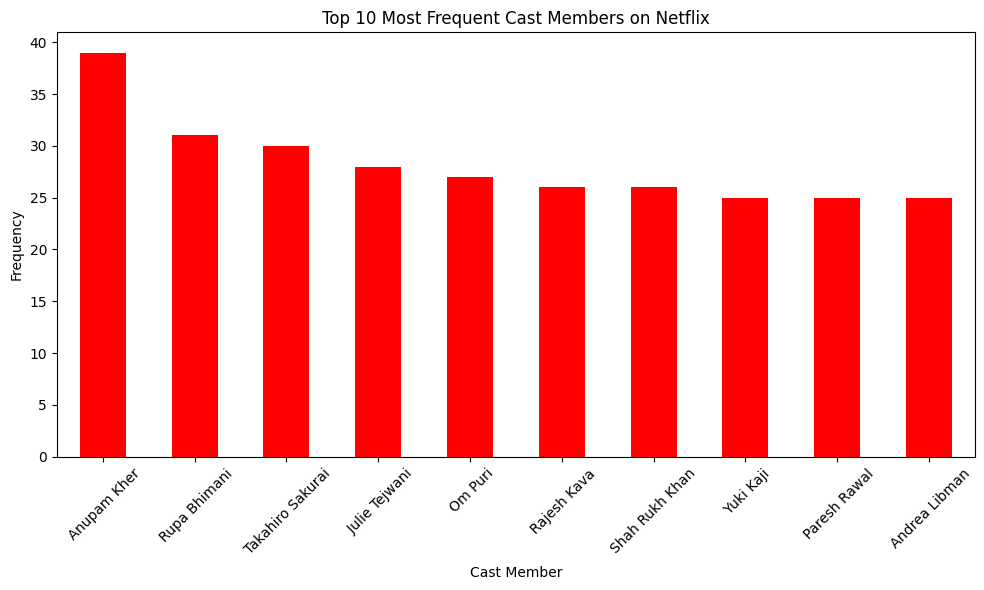

In [32]:
cast_series = df['cast'].dropna().str.split(',').explode()

top_cast = cast_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cast.plot(kind='bar', color='red')
plt.title('Top 10 Most Frequent Cast Members on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8) Content Count by Release Year

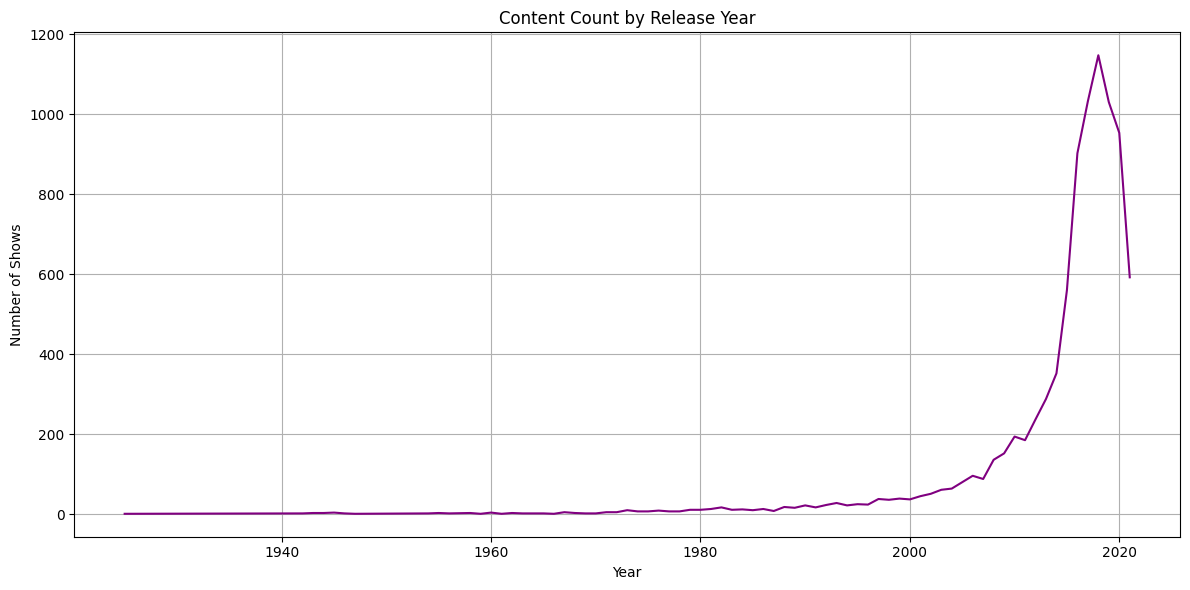

In [33]:
release_year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', color='purple')
plt.title('Content Count by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


## 9) Content Type Over Time

<Figure size 1200x600 with 0 Axes>

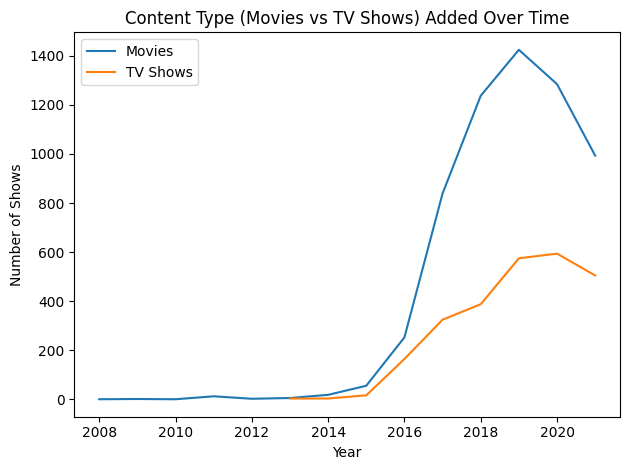

In [34]:
content_type_over_time = df.groupby(['year_added', 'type']).size().unstack()

plt.figure(figsize=(12, 6))
content_type_over_time.plot(kind='line')
plt.title('Content Type (Movies vs TV Shows) Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(['Movies', 'TV Shows'])
plt.tight_layout()
plt.show()


## 10) Top 10 Content with Longest Duration

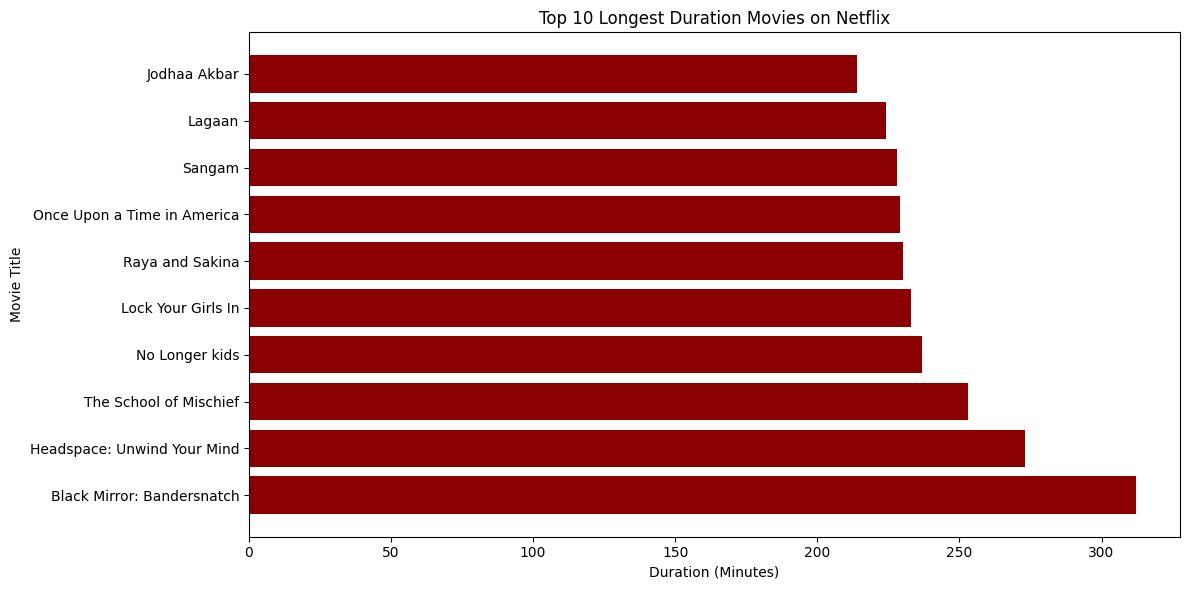

In [37]:
df_movies['duration'] = df_movies['duration'].astype(str).str.replace(' min', '', regex=False)
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')

top_duration = df_movies[['title', 'duration']].sort_values(by='duration', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_duration['title'], top_duration['duration'], color='darkred')
plt.title('Top 10 Longest Duration Movies on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

#### Conclusion:

#### The analyses provide valuable insights for Netflix to improve its content strategy. By understanding the distribution of movies and TV shows, Netflix can better balance its content offerings. Identifying top countries with the most content helps prioritize regional expansion, while tracking content growth over time reveals trends that can guide future acquisitions.

#### Examining prolific directors and cast members can inform talent-based strategies, and analyzing duration distributions helps cater to varying user preferences for short and long content. Finally, understanding genre popularity allows Netflix to tailor content offerings to the interests of its global audience. These insights can ultimately help Netflix improve user engagement and optimize content selection.